# 01_Exploration

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading & Data Inspection

In [25]:
# Load the data
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

# Quick overview
print("🔹 Train Data Shape:", train_df.shape)
print("🔹 Test Data Shape:", test_df.shape)
train_df.head()

🔹 Train Data Shape: (1460, 81)
🔹 Test Data Shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
# Summary of data types and missing values
missing_values = test_df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

print("🔹 Missing Values:")
print(missing_values)

# Check data types
print("\n🔹 Data Types:")
print(train_df.dtypes.value_counts())


🔹 Missing Values:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

🔹 Data Types:
object     43
int64      35
float64     3
Name: count, dtype: int64


In [27]:
train_df.describe().T  # Transpose for better readability

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Text(0.5, 1.0, 'Distribution of House Prices')

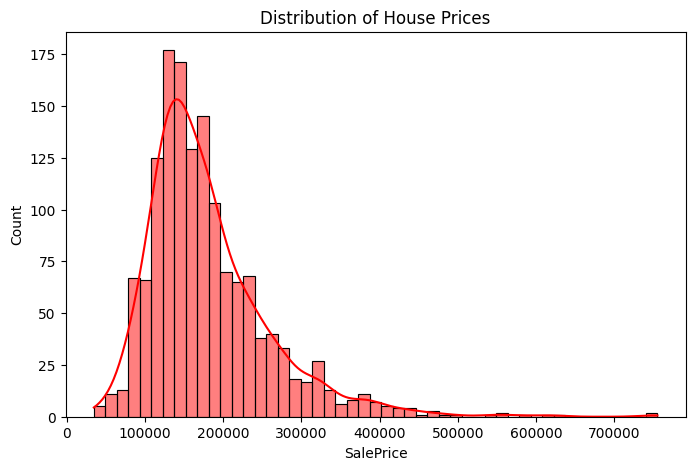

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# SalePrice distribution
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True, color="red")
plt.title("Distribution of House Prices")

## Feature Exploration

In [36]:
# Separate numerical & categorical features
num_features = train_df.select_dtypes(include=["int64", "float64"]).columns
cat_features = train_df.select_dtypes(include=["object"]).columns

print(f"🔹 Numerical Features: {len(num_features)}")
print(f"🔹 Categorical Features: {len(cat_features)}")

🔹 Numerical Features: 38
🔹 Categorical Features: 43


In [38]:
# Select only numerical features (drop categorical ones)
num_features = train_df.select_dtypes(include=["int64", "float64"]).columns

# Compute correlation only on numerical columns
correlation = train_df[num_features].corr()["SalePrice"].sort_values(ascending=False)

# Display the top & bottom correlations
print("🔹 Most Positively Correlated Features:\n", correlation.head(10))
print("\n🔹 Most Negatively Correlated Features:\n", correlation.tail(5))

🔹 Most Positively Correlated Features:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

🔹 Most Negatively Correlated Features:
 YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


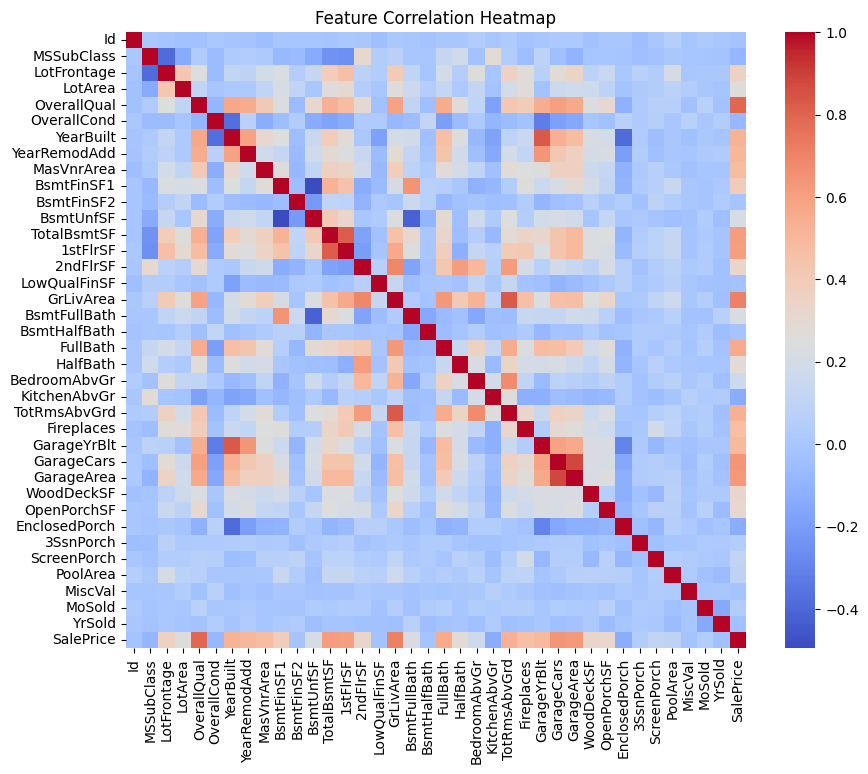

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[num_features].corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'SalePrice vs Overall Quality')

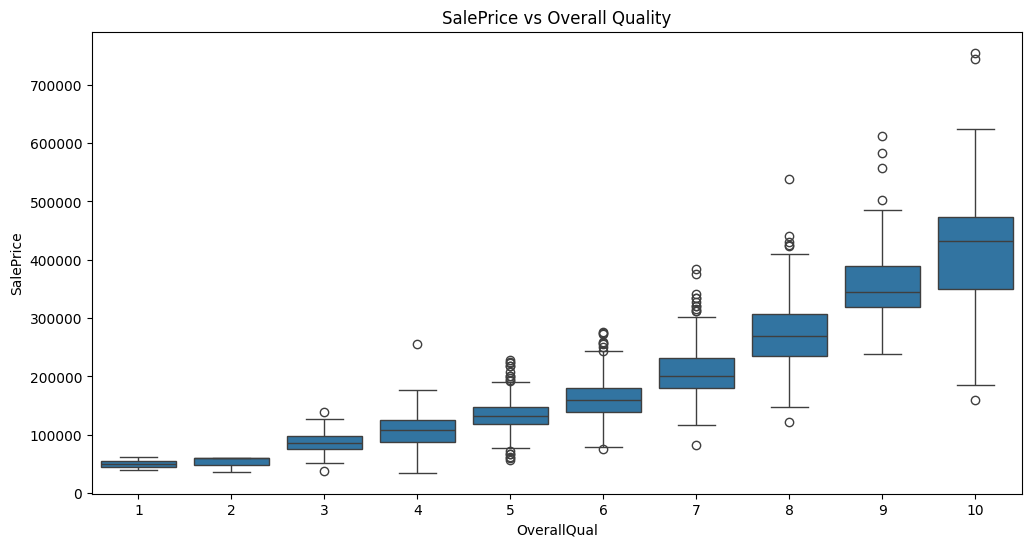

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x=train_df["OverallQual"], y=train_df["SalePrice"])
plt.title("SalePrice vs Overall Quality")